In [4]:
!dcm2niix -h
#!dcm2niix Brain_T1_scan_Patient1

Compression will be faster with pigz.exe in the same folder as the executable
Chris Rorden's dcm2niiX version v1.0.20190902  (JP2:OpenJPEG) (JP-LS:CharLS) MSC1900 (64-bit Windows)
usage: dcm2niix [options] <in_folder>
 Options :
  -1..-9 : gz compression level (1=fastest..9=smallest, default 6)
  -a : adjacent DICOMs (images from same series always in same folder) for faster conversion (n/y, default n)
  -b : BIDS sidecar (y/n/o [o=only: no NIfTI], default y)
   -ba : anonymize BIDS (y/n, default y)
  -c : comment stored in NIfTI aux_file (provide up to 24 characters)
  -d : directory search depth. Convert DICOMs in sub-folders of in_folder? (0..9, default 5)
  -e : export as NRRD instead of NIfTI (y/n, default n)
  -f : filename (%a=antenna (coil) name, %b=basename, %c=comments, %d=description, %e=echo number, %f=folder name, %i=ID of patient, %j=seriesInstanceUID, %k=studyInstanceUID, %m=manufacturer, %n=name of patient, %p=protocol, %r=instance number, %s=series number, %t=time, %u=

In [7]:
!pip install nibabel

In [10]:
import nibabel as nib

file_path = "Brain_T1_scan_Patient1/Brain_T1_scan_Patient1_Sag_T1_MPRAGE_1x1x1_20210108134957_2.nii"
img=nib.load(file_path)
data=img.get_fdata()

In [31]:
data[50].shape
print(data[50].max())
print(data[50].min())
print(data.max())
print(data.min())

3662.0
0.0
5326.0
0.0


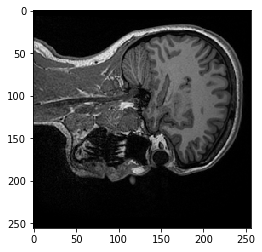

In [20]:
import matplotlib.pyplot as plt
import numpy as np


#plt.imshow(data[50], interpolation='nearest')
plt.imshow(data[50], cmap='gray')
plt.show()


In [36]:
grey_im = data[50]*(255/data[50].max())

In [37]:
print(grey_im.max())

255.0


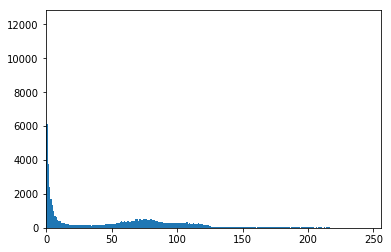

In [39]:
#https://stackoverflow.com/questions/22159160/python-calculate-histogram-of-image
counts, bins = np.histogram(grey_im, range(257))
# plot histogram centered on values 0..255
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()